In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv("SOURCES/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(["Cabin", "Ticket", "Name"] , axis=1, inplace=True)
df["Sex"].replace({"male": 0, "female": 1}, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [6]:
mean_ages = df["Age"].median()
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    int64  
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 55.6+ KB


In [7]:
df_ages = df[["Age"]]
list_ages = list(df_ages["Age"])

df_pclass = df[["Pclass"]]
list_pclass = list(df_pclass["Pclass"])

df_sex = df[["Sex"]]
list_sex = list(df_sex["Sex"])

df_survived = df[["Survived"]]
list_survived = list(df_survived["Survived"])

In [8]:
zipped_data = list(zip(list_pclass, list_ages, list_sex))

my_list = []
for element in zipped_data:
    my_list.append(list(element))

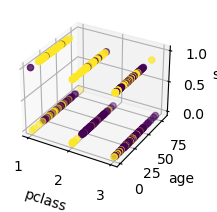

In [9]:
from mpl_toolkits.mplot3d import Axes3D

X = np.array(my_list)
Y = np.array(list_survived)

fig = plt.figure()
ax = fig.add_subplot(222, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap='viridis')
ax.set_xlabel('pclass')
ax.set_ylabel('age')
ax.set_zlabel('sex')

plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

In [11]:
df_test = pd.read_csv("SOURCES/titanic_test.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [13]:
df_test.drop(["Cabin", "Ticket", "Name"] , axis=1, inplace=True)
df_test["Sex"].replace({"male": 0, "female": 1}, inplace=True)
mean_ages = df_test["Age"].median()
df_test["Age"].fillna(mean_ages, inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 26.3+ KB


In [14]:
df_agesT = df_test[["Age"]]
list_agesT = list(df_agesT["Age"])

df_pclassT = df_test[["Pclass"]]
list_pclassT = list(df_pclassT["Pclass"])

df_sexT = df_test[["Sex"]]
list_sexT = list(df_sexT["Sex"])

zipped_data = list(zip(list_pclassT, list_agesT, list_sexT))

my_list = []
for element in zipped_data:
    my_list.append(list(element))
    
X_test = np.array(my_list)

In [15]:
result = knn.predict(X_test)
print(result)

[0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1
 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0
 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0
 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1
 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 0 1 1 1 1 0 1 1 0 1 1]


In [16]:
x = df_test[["PassengerId"]].copy()
x.loc[:,"Survived"] = result
print("\n", x)

print("\nhayatta kalan kişi sayısı:", sum(x.Survived))


      PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         1
..           ...       ...
413         1305         1
414         1306         1
415         1307         0
416         1308         1
417         1309         1

[418 rows x 2 columns]

hayatta kalan kişi sayısı: 207


In [18]:
# x.to_csv("submission14.csv", index=False)